# Menguji Hipotesis Pada Pengguna Paket Data Berbayar

Anda adalah seorang analis di Perusahaan Jaringan Selular. Terdapat beberapa paket selular yang diluncurkan oleh perusahaan anda. Dalam hal ini anda akan menguji beberapa hipotesis untuk bisa mendapatkan analisa yang optimal dari beberapa hal yang ditinjau.

# Pendahuluan:

Dalam penelitian kali ini, melakukan uji hipotesis terhadap pendapatan untuk setiap plan, apakah sama atau tidak. Lalu pendapatan di daerah tertentu. Pengujian hipotesis akan dilakukan dengan menggunakan T-test independent untuk kedua hal tersebut


## Tujuan dan Tahapan:

Tujuan dari pengolahan data kali ini akan menguji 2 hipotesis:
1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda
2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

## Pra-pemrosesan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Memuat Data

In [2]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

Terdapat lima buah dataframe yang masing-masing menjelaskan tentang penggunaan jaringan selular (panggilan telepon, internet, pesan, paket data, dan pengguna) oleh setiap pengguna jasa.

## Mengeksplorasi Data Awal Untuk Mendapatkan Informasi Umum

### Mengeksplorasi Data Pada Tabel Panggilan Telepon

Dalam tabel panggilan telepon, berisi kolom-kolom berikut:

- `id`
- `user_id`
- `call_date`
- `duration`

In [3]:
df_calls.shape

(137735, 4)

In [4]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Dari hasil observasi yang dilakukan, jumlah baris yang terdapat pada tabel berjumlah 137735 dengan tidak adanya nilai 'NaN' disetiap kolom. Untuk type data yang diberikan, terdapat kesalah type data pada kolom 'call_date' yang seharusnya data tersebut memiliki tipe datetime bukan object. Maka dari itu, selanjutnya kita akan mengganti type data tersebut terlebih dahulu.

### Mengeksplorasi Data Pada Tabel Penggunaan Internet

Dalam tabel penggunaan internet, berisi kolom-kolom berikut:

- `id`
- `user_id`
- `session_date`
- `mb_used`

In [7]:
df_internet.shape

(104825, 4)

In [8]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Untuk tabel pengguna internet terdiri dari 104825 baris dan 4 kolom. Sama dengan tabel sebelumnya, disini terdapat type data yang tidak sesuai yaitu pada kolom 'session_date' dimana seharusnya type data untuk kolom tersebut adalah datetime.

### Mengeksplorasi Data Pada Tabel Pengiriman Pesan

Dalam tabel pengiriman pesan, berisi kolom-kolom berikut:

- `id`
- `user_id`
- `message_date`

In [11]:
df_messages.shape

(76051, 3)

In [12]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [13]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Pada tabel messages terdapat 76051 baris dan 3 kolom. Kesalahan tipe data juga terdapat pada kolom 'message_date' yang tidak menggunakan format datetime.

### Mengeksplorasi Data Pada Tabel Jenis Paket Selular

Dalam tabel paket selular, berisi kolom-kolom berikut:

- `messages_included`
- `mb_per_month_included`
- `minutes_included`
- `usd_monthly_pay`
- `usd_per_gb`
- `usd_per_message`
- `usd_per_minute`
- `plan_name`

In [14]:
df_plans.shape

(2, 8)

In [15]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [16]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


Tabel ini menjelaskan tentang kuota yang didapatkan untuk setiap paket yang tersedia.

### Mengeksplorasi Data Pada Tabel Pengguna Paket

Dalam tabel paket selular, berisi kolom-kolom berikut:

- `user_id`
- `first_name`
- `last_name`
- `age`
- `city`
- `reg_date`
- `plan`
- `churn_date`

In [17]:
df_users.shape

(500, 8)

In [18]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Tabel user memberikan informasi mengenai pelanggan yang menggunakan paket dari provider. Disini kita bisa melihat paket apa yang mereka gunakan, sejak kapan mereka menggunakan paket, dan lokasi dimana pelanggan itu berasal.

## Mempersiapkan Data

Data dari tabel yang telah kita observasi terdapat beberapa kesalah ada tipe datanya. Untuk itu kita akan perbaiki tipe data dan mempersiapkan tabel untuk bisa diolah lebih lanjut.

### Jumlah Panggilan dan Menit Yang digunakan Dalam Satu Bulan

In [20]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [21]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Kita akan ubah tipe data untuk call_date menjadi tipe datetime.

In [22]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [23]:
df_calls['month_call'] = df_calls['call_date'].dt.month.astype('str')
df_calls['year_call'] = df_calls['call_date'].dt.year.astype('str')
df_calls['year_month'] = df_calls['year_call'] + '-' + df_calls['month_call']

Kolom year_month disini akan memisahkan penggunaan setiap bulannya dari id yang sama, karena ada perbedaan waktu mulai berlangganan dari setiap id yang tertera di tabel.

In [24]:
df_calls

,id,user_id,call_date,duration,month_call,year_call,year_month
0,1000_93,1000,2018-12-27,8.52,12,2018,2018-12
1,1000_145,1000,2018-12-27,13.66,12,2018,2018-12
2,1000_247,1000,2018-12-27,14.48,12,2018,2018-12
3,1000_309,1000,2018-12-28,5.76,12,2018,2018-12
4,1000_380,1000,2018-12-30,4.22,12,2018,2018-12
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,2018,2018-11
137731,1499_200,1499,2018-10-20,10.89,10,2018,2018-10
137732,1499_201,1499,2018-09-21,8.12,9,2018,2018-9
137733,1499_202,1499,2018-10-10,0.37,10,2018,2018-10


In [25]:
df_calls.loc[df_calls['duration'] == 0]

,id,user_id,call_date,duration,month_call,year_call,year_month
19,1001_4,1001,2018-12-05,0.0,12,2018,2018-12
25,1001_13,1001,2018-12-24,0.0,12,2018,2018-12
31,1001_30,1001,2018-10-17,0.0,10,2018,2018-10
32,1001_31,1001,2018-11-03,0.0,11,2018,2018-11
34,1001_35,1001,2018-12-21,0.0,12,2018,2018-12
...,...,...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,11,2018,2018-11
137715,1499_184,1499,2018-09-15,0.0,9,2018,2018-9
137720,1499_189,1499,2018-12-27,0.0,12,2018,2018-12
137722,1499_191,1499,2018-12-24,0.0,12,2018,2018-12


Untuk duration yang bernilai 0 tetap akan dimasukkan ke dalam tabel, dikarenakan panggilan tersebut dilakukan tapi tidak terjawab, dengan kata lain kuota panggilan yang dimiliki tidak terpotong.

In [26]:
df_calls['duration_total'] = df_calls['duration'].apply(np.ceil).astype('int')

In [27]:
df_calls_user = df_calls.groupby(['user_id', 'year_month']).agg({'duration_total' : ['count', 'sum']}).reset_index()
df_calls_user

user_id year_month duration_total     
                                 count  sum
0       1000    2018-12             16  124
1       1001    2018-10             65  393
2       1001    2018-11             64  426
3       1001    2018-12             56  412
4       1001     2018-8             27  182
...      ...        ...            ...  ...
2253    1498     2018-9             45  363
2254    1499    2018-10             53  385
2255    1499    2018-11             45  308
2256    1499    2018-12             65  496
2257    1499     2018-9             41  346

[2258 rows x 4 columns]

Pada pivot tabel diatas, kita mengelompokkan berdasarkan id pengguna untuk setiap durasi panggilan yang sudah dibulatkan ke atas terlebih dahulu dan jumlah panggilan yang dilakukan.

### Penggunaan Internet

In [28]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [29]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Sama dengan tabel sebelumnya, pada tabel internet kita akan mengubah kolom session_date menjadi tipe datetime dan mencari jumlah penggunaan internet dalam satuan gb.

In [30]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [31]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [32]:
df_internet['month'] = df_internet['session_date'].dt.month.astype('str')
df_internet['year'] = df_internet['session_date'].dt.year.astype('str')
df_internet['year_month'] = df_internet['year'] + '-' + df_internet['month']

Kolom year_month memiliki fungsi yang sama seperti pada tabel sebelumnya.

In [33]:
df_internet_user = df_internet.groupby(['user_id', 'year_month']).agg({'mb_used' : 'sum'}).reset_index()
df_internet_user

,user_id,year_month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-10,22330.49
2,1001,2018-11,18504.30
3,1001,2018-12,19369.18
4,1001,2018-8,6919.15
...,...,...,...
2272,1498,2018-9,22827.28
2273,1499,2018-10,19492.43
2274,1499,2018-11,16813.83
2275,1499,2018-12,22059.21


Pivot tabel di atas mengelomppokan penggunaan internet berdasarkan id pengguna.

In [34]:
df_internet_user['gb_used'] = df_internet_user['mb_used'] / 1024

In [35]:
df_internet_user['gb_used_fix'] = df_internet_user['gb_used'].apply(np.ceil).astype('int')

In [36]:
df_internet_user

,user_id,year_month,mb_used,gb_used,gb_used_fix
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-10,22330.49,21.807119,22
2,1001,2018-11,18504.30,18.070605,19
3,1001,2018-12,19369.18,18.915215,19
4,1001,2018-8,6919.15,6.756982,7
...,...,...,...,...,...
2272,1498,2018-9,22827.28,22.292266,23
2273,1499,2018-10,19492.43,19.035576,20
2274,1499,2018-11,16813.83,16.419756,17
2275,1499,2018-12,22059.21,21.542197,22


Pada tabel diatas kita mengkonversi dari satuan mb ke gb untuk penggunaan internet dan juga membulatkan penggunaan setelah selesai dikonversi.

### Jumlah Pesan Setiap Bulan

In [37]:
df_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [38]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Tabel messages juga memiliki tipe data yang salah pada kolom message_date, sehingga akan diubah ke tipe datetime terlebih dahulu.

In [39]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [40]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [41]:
df_messages['month'] = df_messages['message_date'].dt.month.astype('str')
df_messages['year'] = df_messages['message_date'].dt.year.astype('str')
df_messages['year_month'] = df_messages['year'] + '-' + df_messages['month']

Kegunaan kolom year_month masih sama dengan dua tabel sebelumnya.

In [42]:
df_messages_user = df_messages.groupby(['user_id', 'year_month']).agg({'id' : 'count'}).reset_index().rename(columns={'user_id': 'user_id', 'id':'message_count'})
df_messages_user

,user_id,year_month,message_count
0,1000,2018-12,11
1,1001,2018-10,53
2,1001,2018-11,36
3,1001,2018-12,44
4,1001,2018-8,30
...,...,...,...
1801,1496,2018-11,13
1802,1496,2018-12,11
1803,1496,2018-8,2
1804,1496,2018-9,21


Pivot tabel di atas mengelompokkan penggunaan pengiriman pesan sesuai dengan id pengguna.

### Melihat Tabel User dan Plan

In [43]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Pada tabel users juga terdapat kesalahan tipe data, yaitu pada kolom reg_date, sehingga akan diubah ke tipe datetime.

In [44]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

In [45]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [46]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Pada tabel plan, kita hanya mengkonversi dari mb ke gb dan menempatkannya pada kolom baru.

In [47]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

### Menggabungkan Beberapa Tabel

Selanjutnya kita akan menggabungkan keseluruhan tabel agar bisa melakukan proses perhitungan untuk biaya yang dikeluarkan oleh setiap pengguna.

In [48]:
df_merge_user = pd.merge(df_users, df_plans, left_on = 'plan', right_on = 'plan_name')
df_merge_user

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0
496,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0
497,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0


Kita menggabungkan tabel pengguna dan plan untuk mendapatkan informasi tentang rincian kuota dari paket yang mereka beli.

In [49]:
df_merge_user = df_merge_user.drop(columns = ['first_name', 'last_name', 'age', 'reg_date', 'churn_date'])

Kita drop beberapa kolom yang tidak digunakan untuk perhitungan.

In [50]:
df_merge_user

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,"Knoxville, TN MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
497,1496,"New Orleans-Metairie, LA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0


In [51]:
df_merge = pd.merge(df_calls_user, df_internet_user, on=['user_id', 'year_month'], how='outer')
df_merge

,user_id,year_month,"(user_id, )","(year_month, )","(duration_total, count)","(duration_total, sum)",mb_used,gb_used,gb_used_fix
0,1000,2018-12,1000.0,2018-12,16.0,124.0,1901.47,1.856904,2.0
1,1001,2018-10,1001.0,2018-10,65.0,393.0,22330.49,21.807119,22.0
2,1001,2018-11,1001.0,2018-11,64.0,426.0,18504.30,18.070605,19.0
3,1001,2018-12,1001.0,2018-12,56.0,412.0,19369.18,18.915215,19.0
4,1001,2018-8,1001.0,2018-8,27.0,182.0,6919.15,6.756982,7.0
...,...,...,...,...,...,...,...,...,...
2287,1311,2018-6,NaN,NaN,NaN,NaN,1498.83,1.463701,2.0
2288,1349,2018-10,NaN,NaN,NaN,NaN,13093.55,12.786670,13.0
2289,1349,2018-11,NaN,NaN,NaN,NaN,17128.26,16.726816,17.0
2290,1349,2018-12,NaN,NaN,NaN,NaN,13039.91,12.734287,13.0


Tabel diatas merupakan gabungan dari tabel panggilan telepon dengan penggunaan internet.

In [52]:
df_merge = df_merge.fillna(0).drop(columns = [('user_id', ''), ('year_month', ''),'gb_used', 'mb_used'])

Kita mengisi nilai NaN dengan 0 tidak dengan median atau mean, karena id yang memiliki nilai 0 memang tidak menggunakan layanan tersebut sehingga jika kita isi dengan median atau rata-rata akan mengubah tujuan dari analisis kita.

In [53]:
df_merge

,user_id,year_month,"(duration_total, count)","(duration_total, sum)",gb_used_fix
0,1000,2018-12,16.0,124.0,2.0
1,1001,2018-10,65.0,393.0,22.0
2,1001,2018-11,64.0,426.0,19.0
3,1001,2018-12,56.0,412.0,19.0
4,1001,2018-8,27.0,182.0,7.0
...,...,...,...,...,...
2287,1311,2018-6,0.0,0.0,2.0
2288,1349,2018-10,0.0,0.0,13.0
2289,1349,2018-11,0.0,0.0,17.0
2290,1349,2018-12,0.0,0.0,13.0


In [54]:
df_merge.columns

Index([                  'user_id',                'year_month',
       ('duration_total', 'count'),   ('duration_total', 'sum'),
                     'gb_used_fix'],
      dtype='object')

Melakukan penrubahan pada nama kolom agar lebih mudah untuk diakses pada proses selanjutnya.

In [55]:
df_merge = df_merge.rename(columns = {('duration_total', 'count'): 'duration_count', ('duration_total', 'sum'): 'duration_sum'})

In [56]:
df_merge.columns

Index(['user_id', 'year_month', 'duration_count', 'duration_sum',
       'gb_used_fix'],
      dtype='object')

In [57]:
df_merge_2 = pd.merge(df_merge, df_messages_user, on=['user_id', 'year_month'], how='outer')

In [58]:
df_merge_2

,user_id,year_month,duration_count,duration_sum,gb_used_fix,message_count
0,1000,2018-12,16.0,124.0,2.0,11.0
1,1001,2018-10,65.0,393.0,22.0,53.0
2,1001,2018-11,64.0,426.0,19.0,36.0
3,1001,2018-12,56.0,412.0,19.0,44.0
4,1001,2018-8,27.0,182.0,7.0,30.0
...,...,...,...,...,...,...
2288,1349,2018-10,0.0,0.0,13.0,76.0
2289,1349,2018-11,0.0,0.0,17.0,72.0
2290,1349,2018-12,0.0,0.0,13.0,61.0
2291,1361,2018-5,0.0,0.0,2.0,2.0


Selanjutnya menggabungkan kolom gabungan penggunaan telepon-internet dengan kolom penggunaan pesan.

In [59]:
df_final = pd.merge(df_merge_user, df_merge_2, on = ['user_id'], how = 'inner')

In [60]:
df_final

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,year_month,duration_count,duration_sum,gb_used_fix,message_count
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,2018-12,16.0,124.0,2.0,11.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,2018-11,2.0,10.0,3.0,15.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,2018-12,9.0,59.0,32.0,139.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,2018-10,71.0,476.0,17.0,21.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,2018-11,63.0,446.0,24.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,2018-9,45.0,363.0,23.0,NaN
2289,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,2018-10,53.0,385.0,20.0,NaN
2290,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,2018-11,45.0,308.0,17.0,NaN
2291,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,2018-12,65.0,496.0,22.0,NaN


Tabel diatas adalah tabel gabungan dari keempat tabel yang sudah diproses di awal (tabel telepon, tabel internet, tabel messages, dan tabel users).

In [61]:
df_final.isnull().sum()

user_id                    0
city                       0
plan                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
gb_per_month_included      0
year_month                 0
duration_count             1
duration_sum               1
gb_used_fix                1
message_count            487
dtype: int64

Menghitung nilai NaN pada setiap kolom dan mengisi nilai NaN tersebut dengan nilai 0.

In [62]:
df_final = df_final.fillna(0)

In [63]:
df_final.isna().sum()

user_id                  0
city                     0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
gb_per_month_included    0
year_month               0
duration_count           0
duration_sum             0
gb_used_fix              0
message_count            0
dtype: int64

In [64]:
df_final.shape, df_merge_2.shape

((2293, 17), (2293, 6))

In [65]:
df_final['over_call'] = 0
df_final['over_message'] = 0
df_final['over_gb'] = 0
df_final['over_call_pay'] = 0
df_final['over_message_pay'] = 0
df_final['over_gb_pay'] = 0

for i in range(len(df_final)):
    if df_final['plan'][i] == 'ultimate':
        if df_final['duration_sum'][i] > 3000:
            df_final['over_call'][i] = df_final['duration_sum'][i] - 3000
            df_final['over_call_pay'][i] = df_final['over_call'][i] * 0.01

        elif df_final['message_count'][i] > 1000:
            df_final['over_message'][i] = df_final['message_count'][i] - 1000
            df_final['over_message_pay'][i] = df_final['over_message'][i] * 0.01
        
        elif df_final['gb_used_fix'][i] > 30:
            df_final['over_gb'][i] = df_final['gb_used_fix'][i] - 30
            df_final['over_gb_pay'][i] = df_final['over_gb'][i] * 7
    
    elif df_final['plan'][i] == 'surf':
        if df_final['duration_sum'][i] > 500:
            df_final['over_call'][i] = df_final['duration_sum'][i] - 500
            df_final['over_call_pay'][i] = df_final['over_call'][i] * 0.03

        elif df_final['message_count'][i] > 50:
            df_final['over_message'][i] = df_final['message_count'][i] - 50
            df_final['over_message_pay'][i] = df_final['over_message'][i] * 0.03
        
        elif df_final['gb_used_fix'][i] > 15:
            df_final['over_gb'][i] = df_final['gb_used_fix'][i] - 15
            df_final['over_gb_pay'][i] = df_final['over_gb'][i] * 10


Untuk bisa mengetahui kelebihan dari penggunaan setiap kuota, kita akan melakukan beberapa filter terhadap dataframe. Pertama kita filter dengan jenis plan yang digunakan, selanjutnya kita filter berdasarkan batasan maksimal kuota yang disediakan oleh setiap plan. Jika ada user yang melebihi kuota akan dihitung nilai lebihnya dan dikalikan dengan biaya tambahan per segmen (call, messages, internet). Jika tidak melebihi maka akan tertulis nilai 0 pada id tersebut.

In [66]:
df_final

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,...,duration_count,duration_sum,gb_used_fix,message_count,over_call,over_message,over_gb,over_call_pay,over_message_pay,over_gb_pay
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,16.0,124.0,2.0,11.0,0,0,0,0,0,0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,2.0,10.0,3.0,15.0,0,0,0,0,0,0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,9.0,59.0,32.0,139.0,0,0,2,0,0,14
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,71.0,476.0,17.0,21.0,0,0,0,0,0,0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,63.0,446.0,24.0,37.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,...,45.0,363.0,23.0,0.0,0,0,8,0,0,80
2289,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,...,53.0,385.0,20.0,0.0,0,0,5,0,0,50
2290,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,...,45.0,308.0,17.0,0.0,0,0,2,0,0,20
2291,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,...,65.0,496.0,22.0,0.0,0,0,7,0,0,70


In [67]:
df_final['total_payment'] = 0

for i in range(len(df_final)):
    if df_final['plan'][i] == 'ultimate':
        df_final['total_payment'][i] = df_final['over_call_pay'][i] + df_final['over_message_pay'][i] +df_final['over_gb_pay'][i] + 70
    
    elif df_final['plan'][i] == 'surf':
        df_final['total_payment'][i] = df_final['over_call_pay'][i] + df_final['over_message_pay'][i] +df_final['over_gb_pay'][i] + 20

Selanjutnya kita menghitung total biaya yang perlu dibayarkan oleh setiap id. Biaya tersebut merupakan biaya langganan sesuai plan yang dipilih ditambah dengan biaya kelebihan penggunaan jika memang pelanggan melewati batas kuota penggunaan.

In [68]:
df_final

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,...,duration_sum,gb_used_fix,message_count,over_call,over_message,over_gb,over_call_pay,over_message_pay,over_gb_pay,total_payment
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,124.0,2.0,11.0,0,0,0,0,0,0,70
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,10.0,3.0,15.0,0,0,0,0,0,0,70
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,59.0,32.0,139.0,0,0,2,0,0,14,84
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,476.0,17.0,21.0,0,0,0,0,0,0,70
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,446.0,24.0,37.0,0,0,0,0,0,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,...,363.0,23.0,0.0,0,0,8,0,0,80,100
2289,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,...,385.0,20.0,0.0,0,0,5,0,0,50,70
2290,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,...,308.0,17.0,0.0,0,0,2,0,0,20,40
2291,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,...,496.0,22.0,0.0,0,0,7,0,0,70,90


## Analisis Data

Pada analisis data, kita akan melihat perilaku konsumen dalam penggunaan telepon, pesan, dan internet setiap bulannya. Kita akan membandingkan hasil dari kedua plan yang telah tersedia.

In [69]:
df_final_surf = df_final[df_final['plan'] == 'surf'].reset_index(drop = True)
df_final_ultimate = df_final[df_final['plan'] == 'ultimate'].reset_index(drop = True)

### Paket Data 'surf'

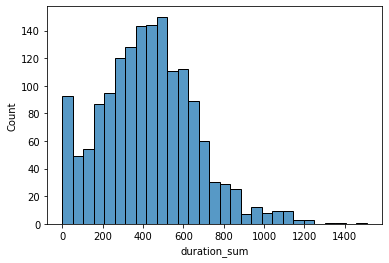

In [70]:
sns.histplot(df_final_surf['duration_sum']);

In [71]:
df_final_surf['duration_sum'].describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: duration_sum, dtype: float64

In [72]:
np.var(df_final_surf['duration_sum'])

54933.334591317485

Dari durasi penggunaan telepon jenis plan surf, kita dapat melihat bahwa durasi penggunaan rata-rata pada angka 428 dengan paling banyak disekitar 500 an. Dan sangat sedikit yang durasinya di atas 1000. Dari nilai varians yang didapat, persebaran nilai untuk durasi panggilan cukup jauh dari rata-rata yang diperoleh. Hal ini disebabkan oleh adanya penggunaan yang memang jauh lebih besar dari rata-rata dan jauh lebih kecil dari rata-rata. Dari histogram juga terlihat banyak yang memiliki nilai 0 dan ada juga yang nilainya diatas dari 800. Nilai 0 sendiri menyatakan bahwa panggilan tersebut tidak terjawab atau memang pengguna tidak menggunakan layanan panggilan telepon sama sekali.

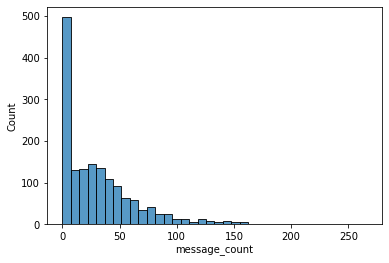

In [73]:
sns.histplot(df_final_surf['message_count']);

In [74]:
df_final_surf['message_count'].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: message_count, dtype: float64

In [75]:
np.var(df_final_surf['message_count'])

1126.008231726662

Pada penggunaan messages di plan surf, didapat rata-rata pada angka 31. Jika dilihat dari histogram, angka 0 menjadi yang paling banyak. Ini disebankan oleh perilaku pengguna yang memang tidak menggunakan layanan pesan. Nilai varians juga cukup besar yang menandakan distribusi nilainya cukup jauh dari nilai rata-rata.

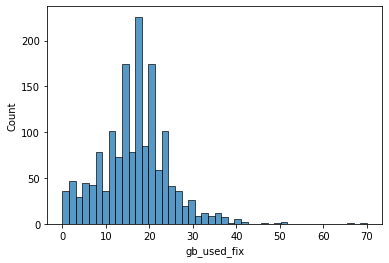

In [76]:
sns.histplot(df_final_surf['gb_used_fix']);

In [77]:
df_final_surf['gb_used_fix'].describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used_fix, dtype: float64

In [78]:
np.var(df_final_surf['gb_used_fix'])

61.54444942447022

Untuk plan surf, pengguna internet memiliki rata-rata penggunaan sebesar 16,67 gb dan paling banyak menggunakan di angka 17 gb. Dari histogram juga terlihat persebaran angkanya hampir merata, walaupun ada yang distribusi nilai jauh dari rata-rata tapi jumlahnya hanya sedikit. Jumlah persebaran terlihat memang paling banyak disekitar nilai rata-rata sehingga nilai varians yang dihasilkan tidak begitu besar.

### Paket Data 'ultimate'

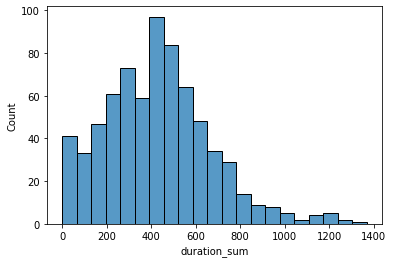

In [79]:
sns.histplot(df_final_ultimate['duration_sum']);

In [80]:
df_final_ultimate['duration_sum'].describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: duration_sum, dtype: float64

In [81]:
np.var(df_final_ultimate['duration_sum'])

57764.12527777777

Untuk plan ultimate, penggunaan telepon memiliki rata-rata sebesar 430 dengan nilai paling banyak di 424. Nilai varians yang didapat cukup besar yang menandakan persebaran nilainya jauh dari rata-rata. Hal ini dibuktikan dengan histogram yang didapat, dimana banyak yang memiliki nilai 0 dan ada beberapa pengguna yang durasi panggilannya diatas 1000. 

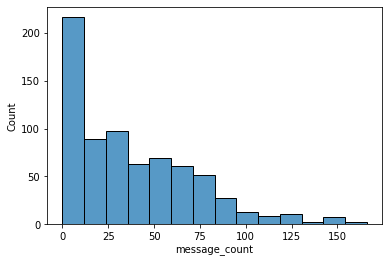

In [82]:
sns.histplot(df_final_ultimate['message_count']);

In [83]:
df_final_ultimate['message_count'].describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: message_count, dtype: float64

In [84]:
np.var(df_final_ultimate['message_count'])

1207.0779147376543

Untuk penggunaan message pada plan ultimate, rata-rata penggunaan pada angka 37 dan paling banyak adalah 0. Besarnya jumlah pengguna yang tidak menggunakan message mengakibatkan nilai varians yang cukup besar. Dimana persebaran nilainya banyak yang jauh dari rata-rata.

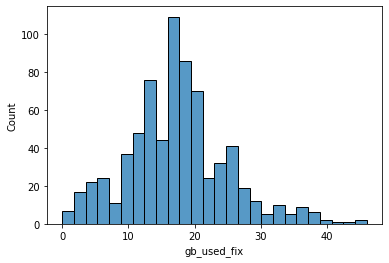

In [85]:
sns.histplot(df_final_ultimate['gb_used_fix']);

In [86]:
df_final_ultimate['gb_used_fix'].describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used_fix, dtype: float64

In [87]:
np.var(df_final_ultimate['gb_used_fix'])

58.748840663580246

Penggunaan internet pada plan ultimate memiliki rata-rata di 17 dengan kebanyakan pengguna juga menggunakan kuota disekitaran angka tersebut. Nilai varians yang didapat juga tidak begitu besar, hal ini terlihat pada histogram yang didapat, persebaran nilainya memang banyak berada di sekitar nilai rata-rata.

## Uji Hipotesis

### Rata-rata Pendapatan Paket Surf dan Ultimate Berbeda

- H0 = Rata-rata pendapatan plan 'surf' dan 'ultimate' SAMA
- H1 = Rata-rata pendapatan plan 'surf' dan 'ultimate' TIDAK SAMA

Kedua hipotesis menggunakan alpha = 0.05, agar tingkat kepercayaan dari pengujian hipotesis sebesar 95% (100 *(1-alpha) %).

Hipotesis null yang kita berikan adalah kedua plan memiliki pendapatan yang SAMA, sedangkan hipotesis alternatifnya adalah bentuk negasi dari hipotesis null dimana pendapatannya TIDAK SAMA.

In [88]:
np.var(df_final_surf['total_payment']), np.var(df_final_ultimate['total_payment'])

(1323.7120504185175, 129.66814043209877)

In [89]:
df_final_surf['total_payment'].describe(), df_final_ultimate['total_payment'].describe()

(count    1573.000000
 mean       37.411952
 std        36.394424
 min        20.000000
 25%        20.000000
 50%        22.000000
 75%        35.000000
 max       380.000000
 Name: total_payment, dtype: float64,
 count    720.000000
 mean      72.313889
 std       11.395108
 min       70.000000
 25%       70.000000
 50%       70.000000
 75%       70.000000
 max      182.000000
 Name: total_payment, dtype: float64)

Dengan menggunakan metode describe, kita mendapatkan perbedaan dari rata-rata pendapatan plan ultimate dengan plan surf, dimana pendapatan plan ultimate hampir dua kali dari plan surf. Dengan melihat dari hasil describe dapat disimpulkan bahwa nilai rata-rata pendapatan tidak sama.

In [90]:
(np.var(df_final_surf['total_payment']) - np.var(df_final_ultimate['total_payment'])) / np.var(df_final_surf['total_payment']) * 100

90.20420336952425

In [91]:
alpha = 0.05

results = st.ttest_ind(df_final_surf['total_payment'], df_final_ultimate['total_payment'], equal_var = True)

print('p-value= ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita menerima hipotesis nol')

p-value=  1.2137878121025043e-123
Kita menolak hipotesis nol


Dengan menggunakan T-test independent (Levene's Method), didapatkan p-value sebesar 1.2137878121025043e-123, dengan kata lain p-value < alpha. Mengacu dengan hasil itu kita menolak Hipotesis Null dimana rata-rata pendapatan kedua plan sama.

Dengan melihat hasil diatas, penggunaan T-test independent memiliki hasil yang lebih akurat, karena pada prosesnya akan melihat varians dari kedua data yang dibandingkan, serta tes ini mengasumsikan bahwa populasi memiliki varian identik secara default.

### Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan Wilayah Lain

- H0 = Rata-rata pendapatan di wilayah NY-NJ dengan Wilayah Lain SAMA
- H1 = Rata-rata pendapatan di wilayah NY-NJ dengan Wilayah Lain TIDAK SAMA

In [92]:
df_final_ny = df_final[df_final['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index(drop = True)
df_final_not_ny = df_final[df_final['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA'].reset_index(drop = True)

In [93]:
df_final_ny.head()

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,...,duration_sum,gb_used_fix,message_count,over_call,over_message,over_gb,over_call_pay,over_message_pay,over_gb_pay,total_payment
0,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,563.0,19.0,2.0,0,0,0,0,0,0,70
1,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,611.0,16.0,1.0,0,0,0,0,0,0,70
2,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,471.0,13.0,5.0,0,0,0,0,0,0,70
3,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,304.0,11.0,1.0,0,0,0,0,0,0,70
4,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,...,483.0,22.0,2.0,0,0,0,0,0,0,70


In [94]:
df_final_ny['total_payment'].describe(), df_final_not_ny['total_payment'].describe()

(count    377.000000
 mean      43.978780
 std       36.705333
 min       20.000000
 25%       20.000000
 50%       24.000000
 75%       70.000000
 max      280.000000
 Name: total_payment, dtype: float64,
 count    1916.000000
 mean       49.235386
 std        34.368186
 min        20.000000
 25%        20.000000
 50%        37.000000
 75%        70.000000
 max       380.000000
 Name: total_payment, dtype: float64)

Dari metode describe, kita bisa melihat bahwa rata-rata pendapatan di NY-NJ dengan daerah lainnya berbeda meskipun selisihnya kecil.

In [95]:
np.var(df_final_ny['total_payment']), np.var(df_final_not_ny['total_payment'])

(1343.7077725165168, 1180.5557624291212)

In [96]:
(np.var(df_final_ny['total_payment']) - np.var(df_final_not_ny['total_payment'])) / np.var(df_final_ny['total_payment']) * 100

12.14192649803923

In [97]:
alpha = 0.05

results = st.ttest_ind(df_final_ny['total_payment'], df_final_not_ny['total_payment'], equal_var = True)

print('p-value= ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita menerima hipotesis nol')

p-value=  0.007330067724376907
Kita menolak hipotesis nol


Nilai p-value yang didapat sebesar 0.007330067724376907 dan p-value < alpha. Sehingga kesimpulan yang kita tarik adalah kita menolak Hipotesis Null dimana pendapatan di kedua wilayah sama.

Dengan melihat hasil diatas, penggunaan T-test independent memiliki hasil yang lebih akurat, karena pada prosesnya akan melihat varians dari kedua data yang dibandingkan, serta tes ini mengasumsikan bahwa populasi memiliki varian identik secara default.

## Kesimpulan

Dari hasil pengujian hipotesis di atas, dapat kita simpulkan bahwa:
- Rata-rata pendapatan setiap plan TIDAK SAMA, karena nilai p-value < alpha. Nilai p-value yang didapat 1.2137878121025043e-123 jauh dibawah dari alpha yang ditentukan yaitu 0.05, sehingga kita menolah hipotesis null.
- Rata-rata pendapatan di NY-NJ dengan daerah lain TIDAK SAMA, karena nilai p-value < alpha. Nilai p-value yang didapat 0.007330067724376907 jauh dibawah dari alpha yang ditentukan yaitu 0.05, sehingga kita menolah hipotesis null.